# Noisy signals

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from random import random, sample
plt.rcParams['figure.figsize'] = [20, 5]
%run Fourier.ipynb

## Time domain

**Fs** is the sampling frequency, **T.** is the sampling period, **L.** the lenght or the signal and **t** the time vector.

In [ ]:
Fs = 1000                            
T = 1 / Fs                   
L = 1500;         
t = [float(i) for i in list(range(1, L-1))]
t = np.array(t)
t = t * T

Now, form a signal containing a 50 Hz sinusoid of amplitude 0.7 and a 120 Hz sinusoid of amplitude 1.

In [ ]:
S = 0.7 * np.sin(2 * math.pi * 50 * t) + np.sin(2* math.pi * 120 * t)

In [ ]:
plt.plot(S)
plt.show()

Corrupt the signal with zero-mean white noise with a variance of 4.

In [ ]:
wn = np.random.normal(loc=0, scale=2, size=len(t)) 
plt.plot(wn)
plt.show()

In [ ]:
X = S + 2 * wn
plt.plot(X)
plt.show()

## Frequency domain

Calculate FFT

In [ ]:
Y = fft(X);

Compute the two-sided spectrum P2. Then compute the single-sided spectrum P1 based on P2 and the even-valued signal length L.

In [44]:
P2 = abs(Y/L)
P1 = P2[range(1,L//2+1)]

P1[range(2,len(P1)-1)] = 2 * P1[range(2, len(P1)-1)]

Define the frequency domain f and plot the single-sided amplitude spectrum P1. The amplitudes are not exactly at 0.7 and 1, as expected, because of the added noise.  
On average, longer signals produce better frequency approximations.

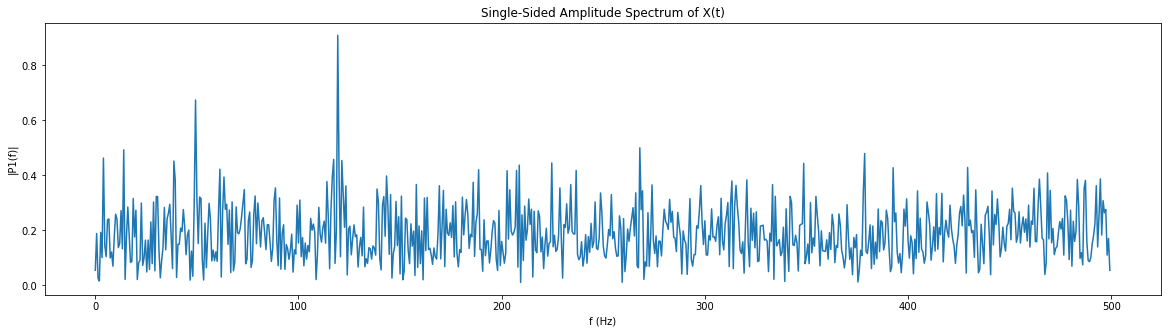

In [45]:
f = Fs * np.array(range(0,(L//2))) / L

plt.plot(f, P1) 
plt.title('Single-Sided Amplitude Spectrum of X(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
plt.show()

In [ ]:
It can be seen the high frequencies at 50 and 120 as expected

## Credits & Links

Translated from Matlab code here:
https://www.mathworks.com/help/matlab/ref/fft.html